House price time series analysis

In [2]:
import warnings                                  
warnings.filterwarnings('ignore')

import numpy as np                               
import pandas as pd                              
import matplotlib.pyplot as plt                  
import seaborn as sns                            

from dateutil.relativedelta import relativedelta 
from scipy.optimize import minimize              

import statsmodels.formula.api as smf            
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs
%matplotlib inline

In [3]:
data = pd.read_csv("raw_sales.csv")

In [4]:
data.head()

,datesold,postcode,price,propertyType,bedrooms
0,2007-02-07 00:00:00,2607,525000,house,4
1,2007-02-27 00:00:00,2906,290000,house,3
2,2007-03-07 00:00:00,2905,328000,house,3
3,2007-03-09 00:00:00,2905,380000,house,4
4,2007-03-21 00:00:00,2906,310000,house,3


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29580 entries, 0 to 29579
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   datesold      29580 non-null  object
 1   postcode      29580 non-null  int64 
 2   price         29580 non-null  int64 
 3   propertyType  29580 non-null  object
 4   bedrooms      29580 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 1.1+ MB


In [6]:
print("Time period from {} to {}".format(data.datesold.min(), data.datesold.max()))

Time period from 2007-02-07 00:00:00 to 2019-07-27 00:00:00


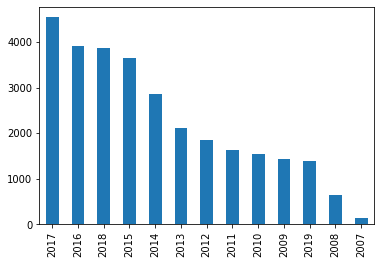

In [9]:
# Yearly number of house sales between 2007 and 2019
pd.to_datetime(data.datesold).dt.year.value_counts().plot(kind = 'bar')

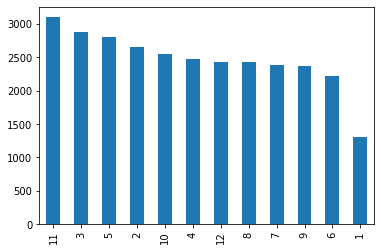

In [10]:
# Monthly number of house sales between 2007 and 2019
pd.to_datetime(data.datesold).dt.month.value_counts().plot(kind = 'bar')

In [12]:
# We bin the postcode for easier analysis
bins = pd.IntervalIndex.from_tuples([(2600, 2700), (2701, 2800), (2801, 2915)])
data['postcode_bin'] = pd.cut(data['postcode'],bins)

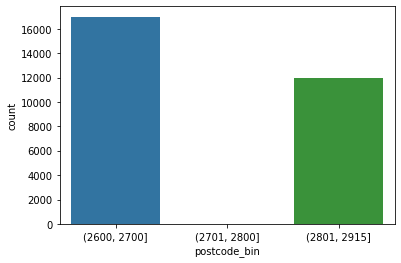

In [13]:
sns.countplot(data['postcode_bin'])

In [14]:
data.propertyType.value_counts()

house    24552
unit      5028
Name: propertyType, dtype: int64

In [15]:
data['datesold']= pd.to_datetime(data['datesold'])

In [16]:
from pandas import Interval

# House sales in postcode 2600 - 2700
data1 = data[data.postcode_bin == Interval(2600, 2700, closed='right')]

# House sales in postcode 2801-2915
data2 = data[data.postcode_bin == Interval(2801, 2915, closed='right')]

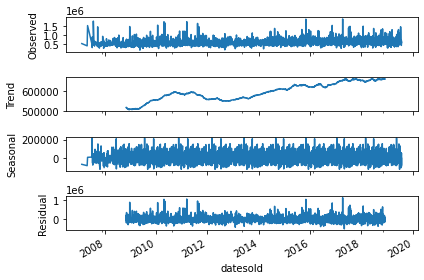

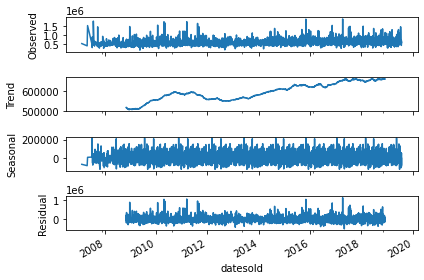

In [18]:
sm.tsa.seasonal_decompose(data1.groupby('datesold').price.mean(), freq=365).plot()

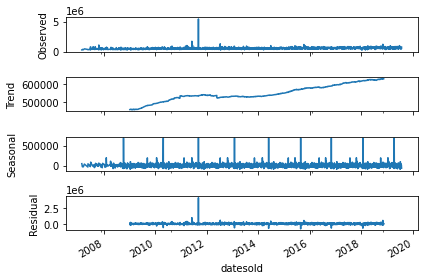

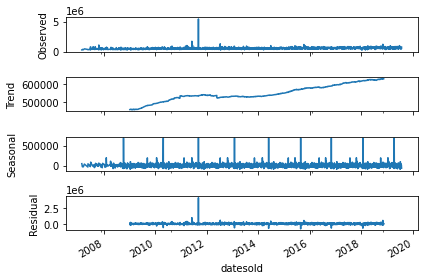

In [19]:
sm.tsa.seasonal_decompose(data2.groupby('datesold').price.mean(), freq=365).plot()

In [21]:
data_house = data[data.propertyType == 'house'] 
data_unit = data[data.propertyType == 'unit']

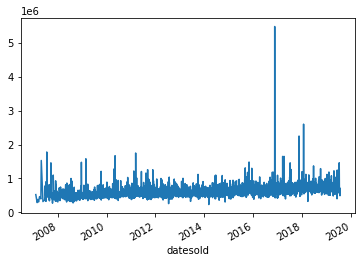

In [22]:
# Average Sale price of house property type over years
data_house.groupby(['datesold']).price.mean().plot()

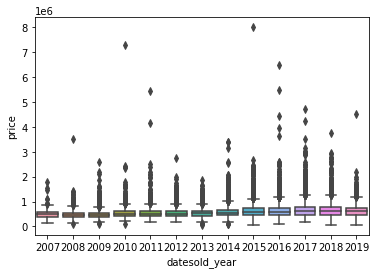

In [26]:
# Yearly house sale price variation over time for all house sales
data['datesold_year'] = data['datesold'].dt.year
sns.boxplot(x= 'datesold_year', y = 'price', data=data)